# 4. Quality Metrics


Import Libraries


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

Reading Data


In [8]:
lines_gdf_stat = gpd.read_file('data/2_lines_gdf_stat.gpkg')

lines_gdf_cars = lines_gdf_stat[lines_gdf_stat['object_type'] =='CAR']
lines_gdf_pedestrians = lines_gdf_stat[lines_gdf_stat['object_type'] =='PEDESTRIAN']
lines_gdf_two_wheelers = lines_gdf_stat[lines_gdf_stat['object_type'] =='CYCLIST']

Based on this cahracteristics we can distinguish statistical outliers and use it as a data quality metrics


In [9]:
def detect_outliers(df, columns):
    # Create a copy of the DataFrame to avoid modifying the original
    df_outliers = df.copy()
    
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
        Q1 = df_outliers[col].quantile(0.25)
        Q3 = df_outliers[col].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Determine outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Create a new field indicating outliers
        outlier_field = f"{col}_outlier"
        df_outliers[outlier_field] = ((df_outliers[col] < lower_bound) | (df_outliers[col] > upper_bound)).astype(int)
        
    # Calculate the sum of outliers for each row
    outlier_columns = [f"{col}_outlier" for col in columns]
    df_outliers['total_outliers'] = df_outliers[outlier_columns].sum(axis=1)
    
    return df_outliers


In [10]:
columns_to_check = ['total_time', 'avg_v', 'avg_width', 'avg_height', 'avg_length', 'route_length', 'distance_first_last']
cars_outliers = detect_outliers(lines_gdf_cars, columns_to_check)
cars_outliers.head()

,object_id,total_time,avg_heading,avg_v,avg_width,avg_length,avg_height,object_type,time_class,avg_heading_change,...,direct_real_d_ratio,geometry,total_time_outlier,avg_v_outlier,avg_width_outlier,avg_height_outlier,avg_length_outlier,route_length_outlier,distance_first_last_outlier,total_outliers
0,152997118,286302,133.7800,0.03,1.869,4.387,1.151,CAR,0,0.065886,...,623.585910,"LINESTRING (13.06440 47.81014, 13.06441 47.810...",1,0,0,0,0,0,0,1
2,152997182,270701,139.9335,0.02,1.912,4.523,1.690,CAR,0,-0.068684,...,698.199732,"LINESTRING (13.06413 47.81005, 13.06413 47.810...",1,0,0,0,0,0,0,1
3,152997183,101799,105.4660,0.01,1.872,4.867,1.566,CAR,0,-0.081633,...,1.208331,"LINESTRING (13.06339 47.80977, 13.06339 47.809...",0,0,0,0,0,0,0,0
4,152997184,100897,97.4585,0.01,1.974,5.000,1.615,CAR,0,-0.053851,...,1.299410,"LINESTRING (13.06339 47.80978, 13.06340 47.809...",0,0,0,0,0,0,0,0
7,152997753,109398,34.2955,0.04,2.227,5.777,2.422,CAR,0,0.225113,...,2.013326,"LINESTRING (13.06394 47.80935, 13.06394 47.809...",0,0,1,0,1,0,0,2


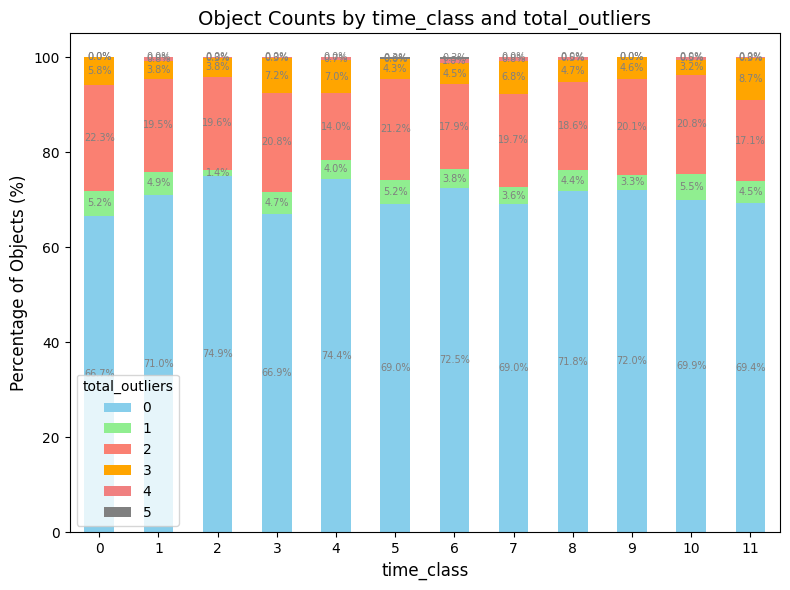

In [11]:
# Calculate the counts and percentages of each combination of time_class and total_outliers
counts = cars_outliers.groupby(['time_class', 'total_outliers']).size().reset_index(name='count')
total_counts = counts.groupby('time_class')['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100

# Pivot the data to prepare for plotting
pivot_counts = counts.pivot(index='time_class', columns='total_outliers', values='percentage').fillna(0)

# Plotting
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral', 'gray']  # Define additional colors
ax = pivot_counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

# Add labels and title
ax.set_title('Object Counts by time_class and total_outliers', fontsize=14)
ax.set_xlabel('time_class', fontsize=12)
ax.set_ylabel('Percentage of Objects (%)', fontsize=12)

ax.legend(title='total_outliers', fontsize=10)

# Show percentages inside each bar segment
for i in range(pivot_counts.shape[0]):
    total = pivot_counts.iloc[i].sum()
    cum_sum = 0
    for j in range(pivot_counts.shape[1]):
        value = pivot_counts.iloc[i, j]
        ax.text(i, cum_sum + value / 2, f'{value:.1f}%', ha='center', va='center', color='gray', fontsize=7)
        cum_sum += value

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Pedestrians


In [12]:
columns_to_check = ['total_time', 'avg_v', 'avg_width', 'avg_height', 'avg_length', 'route_length', 'distance_first_last']
pedestrians_outliers = detect_outliers(lines_gdf_pedestrians, columns_to_check)
pedestrians_outliers.head()

,object_id,total_time,avg_heading,avg_v,avg_width,avg_length,avg_height,object_type,time_class,avg_heading_change,...,direct_real_d_ratio,geometry,total_time_outlier,avg_v_outlier,avg_width_outlier,avg_height_outlier,avg_length_outlier,route_length_outlier,distance_first_last_outlier,total_outliers
1,152997181,138700,148.052,0.770,0.559,0.5585,1.3320,PEDESTRIAN,0,-0.048435,...,1.684016,"LINESTRING (13.06399 47.81006, 13.06399 47.810...",1,0,0,0,0,1,1,3
5,152997343,108398,228.052,0.100,0.659,0.6375,1.0935,PEDESTRIAN,0,-0.075645,...,2.245971,"LINESTRING (13.06429 47.80957, 13.06429 47.809...",1,0,0,0,0,0,0,1
6,152997466,115007,233.052,0.070,0.459,0.5000,1.4510,PEDESTRIAN,0,-0.175439,...,1.953137,"LINESTRING (13.06442 47.80944, 13.06441 47.809...",1,0,0,0,0,1,1,3
8,152997836,109009,134.466,0.020,0.574,0.6820,1.2320,PEDESTRIAN,0,-0.089454,...,1.146090,"LINESTRING (13.06453 47.80964, 13.06453 47.809...",1,0,0,0,0,1,1,3
9,152997959,116001,223.052,0.585,0.448,0.3850,1.1940,PEDESTRIAN,0,0.288462,...,3.144418,"LINESTRING (13.06450 47.80986, 13.06451 47.809...",1,0,0,0,0,1,0,2


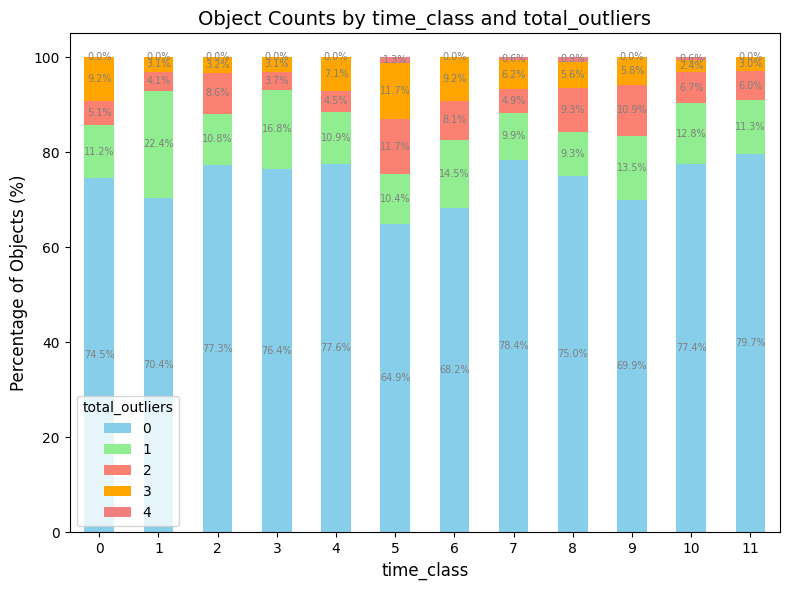

In [13]:
# Calculate the counts and percentages of each combination of time_class and total_outliers
counts = pedestrians_outliers.groupby(['time_class', 'total_outliers']).size().reset_index(name='count')
total_counts = counts.groupby('time_class')['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100

# Pivot the data to prepare for plotting
pivot_counts = counts.pivot(index='time_class', columns='total_outliers', values='percentage').fillna(0)

# Plotting
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral']  # Define additional colors
ax = pivot_counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

# Add labels and title
ax.set_title('Object Counts by time_class and total_outliers', fontsize=14)
ax.set_xlabel('time_class', fontsize=12)
ax.set_ylabel('Percentage of Objects (%)', fontsize=12)

ax.legend(title='total_outliers', fontsize=10)

# Show percentages inside each bar segment
for i in range(pivot_counts.shape[0]):
    total = pivot_counts.iloc[i].sum()
    cum_sum = 0
    for j in range(pivot_counts.shape[1]):
        value = pivot_counts.iloc[i, j]
        ax.text(i, cum_sum + value / 2, f'{value:.1f}%', ha='center', va='center', color='gray', fontsize=7)
        cum_sum += value

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Two-Wheelers


In [14]:
columns_to_check = ['total_time', 'avg_v', 'avg_width', 'avg_height', 'avg_length', 'route_length', 'distance_first_last']
two_wheelers_outliers = detect_outliers(lines_gdf_two_wheelers, columns_to_check)


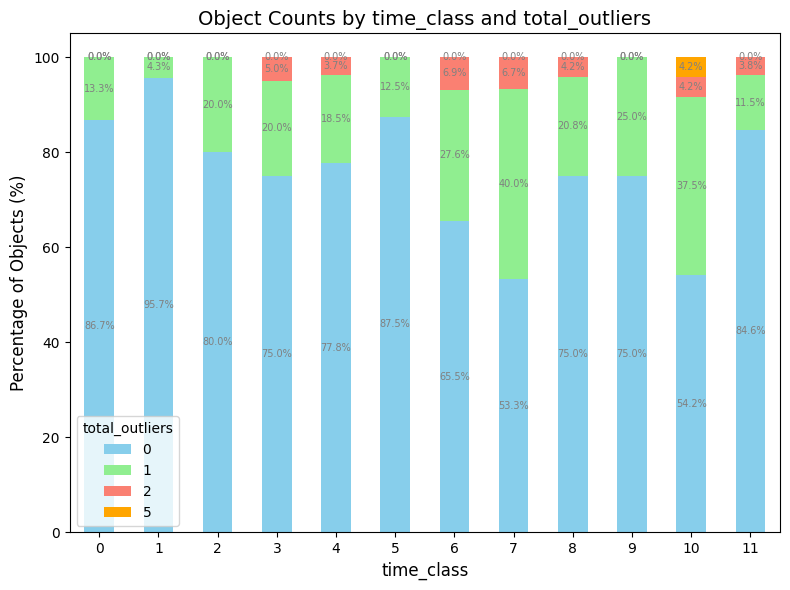

In [15]:
# Calculate the counts and percentages of each combination of time_class and total_outliers
counts = two_wheelers_outliers.groupby(['time_class', 'total_outliers']).size().reset_index(name='count')
total_counts = counts.groupby('time_class')['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100

# Pivot the data to prepare for plotting
pivot_counts = counts.pivot(index='time_class', columns='total_outliers', values='percentage').fillna(0)

# Plotting
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral']  # Define additional colors
ax = pivot_counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

# Add labels and title
ax.set_title('Object Counts by time_class and total_outliers', fontsize=14)
ax.set_xlabel('time_class', fontsize=12)
ax.set_ylabel('Percentage of Objects (%)', fontsize=12)

ax.legend(title='total_outliers', fontsize=10)

# Show percentages inside each bar segment
for i in range(pivot_counts.shape[0]):
    total = pivot_counts.iloc[i].sum()
    cum_sum = 0
    for j in range(pivot_counts.shape[1]):
        value = pivot_counts.iloc[i, j]
        ax.text(i, cum_sum + value / 2, f'{value:.1f}%', ha='center', va='center', color='gray', fontsize=7)
        cum_sum += value

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()